<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.228717,80.351328,65.151347,29.405620,0.000195,280.137208,280.138112,-0.000904
1,0.0,1.0,26.191868,96.607735,45.785167,28.285711,-0.001079,206.869402,206.869992,-0.000590
2,0.0,2.0,86.582821,49.754391,44.073888,26.323812,-0.002167,216.732745,216.736428,-0.003682
3,0.0,3.0,60.804816,99.683543,75.077207,75.449322,-0.000840,321.014048,321.013711,0.000337
4,0.0,4.0,25.050986,55.519404,45.840153,25.144787,-0.000035,161.555293,161.556375,-0.001082
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.664927,66.862294,30.832902,50.465389,-0.000751,244.824761,244.825288,-0.000527
19996,999.0,16.0,99.137398,23.554886,58.289735,47.681991,-0.003505,238.660504,238.662131,-0.001627
19997,999.0,17.0,55.351671,76.595315,45.328834,39.039632,0.000329,226.315781,226.315292,0.000489
19998,999.0,18.0,26.889070,86.446633,74.774560,77.760289,-0.000328,275.870224,275.869995,0.000229


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.228717,80.351328,65.151347,29.405620,0.000195,280.137208,280.138112,-0.000904
1,0.0,1.0,26.191868,96.607735,45.785167,28.285711,-0.001079,206.869402,206.869992,-0.000590
2,0.0,2.0,86.582821,49.754391,44.073888,26.323812,-0.002167,216.732745,216.736428,-0.003682
3,0.0,3.0,60.804816,99.683543,75.077207,75.449322,-0.000840,321.014048,321.013711,0.000337
4,0.0,4.0,25.050986,55.519404,45.840153,25.144787,-0.000035,161.555293,161.556375,-0.001082
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.664927,66.862294,30.832902,50.465389,-0.000751,244.824761,244.825288,-0.000527
19996,999.0,16.0,99.137398,23.554886,58.289735,47.681991,-0.003505,238.660504,238.662131,-0.001627
19997,999.0,17.0,55.351671,76.595315,45.328834,39.039632,0.000329,226.315781,226.315292,0.000489
19998,999.0,18.0,26.889070,86.446633,74.774560,77.760289,-0.000328,275.870224,275.869995,0.000229


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.228717,80.351328,65.151347,29.405620,0.000195,280.137208,280.138112,-0.000904
1,0.0,1.0,26.191868,96.607735,45.785167,28.285711,-0.001079,206.869402,206.869992,-0.000590
2,0.0,2.0,86.582821,49.754391,44.073888,26.323812,-0.002167,216.732745,216.736428,-0.003682
3,0.0,3.0,60.804816,99.683543,75.077207,75.449322,-0.000840,321.014048,321.013711,0.000337
4,0.0,4.0,25.050986,55.519404,45.840153,25.144787,-0.000035,161.555293,161.556375,-0.001082
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.664927,66.862294,30.832902,50.465389,-0.000751,244.824761,244.825288,-0.000527
19996,999.0,16.0,99.137398,23.554886,58.289735,47.681991,-0.003505,238.660504,238.662131,-0.001627
19997,999.0,17.0,55.351671,76.595315,45.328834,39.039632,0.000329,226.315781,226.315292,0.000489
19998,999.0,18.0,26.889070,86.446633,74.774560,77.760289,-0.000328,275.870224,275.869995,0.000229


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

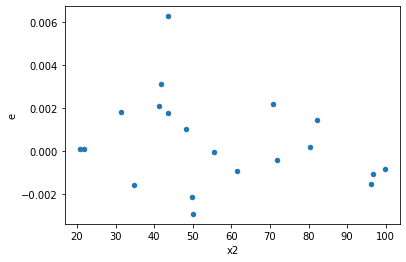

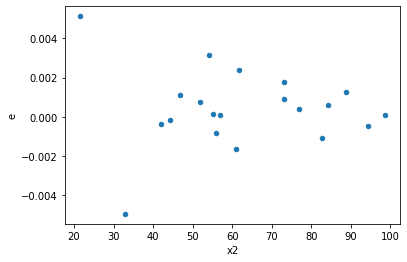

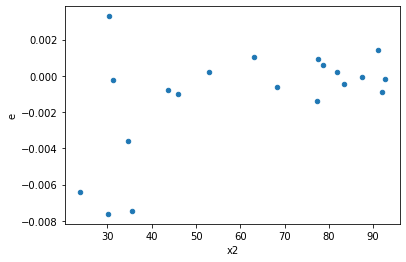

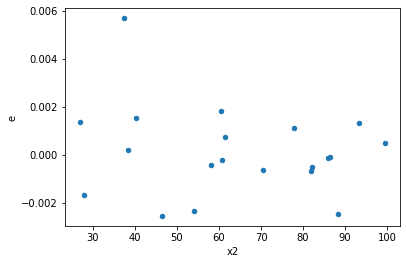

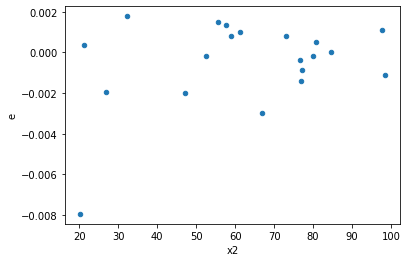

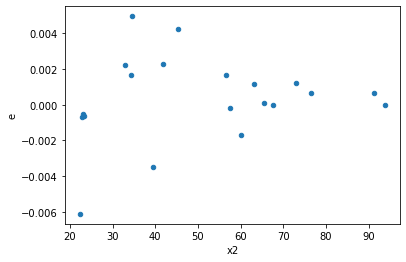

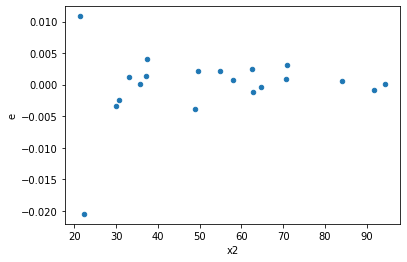

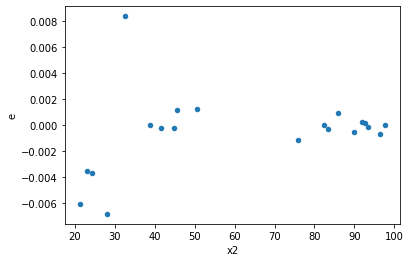

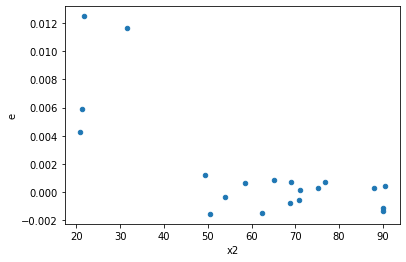

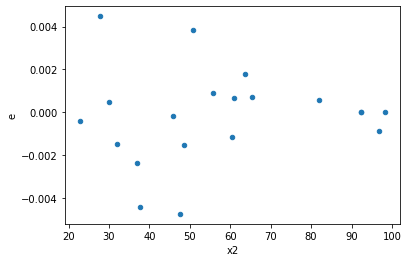

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
21.0,4.0,4.0,3.734111401872624e-06,1.013543695448389e-05,9.33527850468156e-07,2.5338592386209723e-06,2.7142834971128758,0.3568506297746945,0.8215746851126527,0.17842531488734725,Reject001=1 : Homoscedasticity
164.0,4.0,4.0,1.5551457713474407e-06,6.528540555567648e-06,3.887864428368602e-07,1.632135138891912e-06,4.1980248256155805,0.1935818306523982,0.9032090846738009,0.0967909153261991,Reject001=1 : Homoscedasticity
200.0,4.0,4.0,6.233513918736541e-07,4.683064175946582e-06,1.5583784796841353e-07,1.1707660439866454e-06,7.512719530264212,0.07631282057652,0.96184358971174,0.03815641028826,Reject001=1 : Homoscedasticity
206.0,4.0,4.0,1.7314462039962548e-06,5.629868383081543e-06,4.328615509990637e-07,1.4074670957703858e-06,3.2515410355156034,0.27988915132868675,0.8600554243356566,0.13994457566434337,Reject001=1 : Homoscedasticity
210.0,4.0,4.0,1.9787772868184587e-06,2.1095556983979442e-06,4.946943217046147e-07,5.273889245994861e-07,1.0660905158203808,0.9520340664749942,0.5239829667625029,0.4760170332374971,Reject001=1 : Homoscedasticity
248.0,4.0,4.0,9.26373780120883e-06,1.0061730652328963e-05,2.3159344503022073e-06,2.5154326630822406e-06,1.0861415627519166,0.9380967675162397,0.5309516162418801,0.46904838375811986,Reject001=1 : Homoscedasticity
320.0,4.0,4.0,1.5218744345403335e-06,2.269569901069254e-06,3.804686086350834e-07,5.673924752673135e-07,1.4912990517215399,0.7080257309959364,0.6459871345020318,0.3540128654979682,Reject001=1 : Homoscedasticity
407.0,4.0,4.0,1.0241464582930265e-05,1.288205085541689e-05,2.560366145732566e-06,3.2205127138542223e-06,1.2578328764508704,0.8294523085902479,0.5852738457048761,0.41472615429512394,Reject001=1 : Homoscedasticity
408.0,4.0,4.0,7.131336129074964e-07,1.9366156458564504e-06,1.782834032268741e-07,4.841539114641126e-07,2.7156420771708274,0.35661824240863105,0.8216908787956845,0.17830912120431552,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,1.1993579792507626e-05,2.278307620105316e-06,2.9983949481269066e-06,5.69576905026329e-07,0.1899606005480175,0.13662954937957913,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,4.551351932104559e-05,3.4858308253513514e-06,1.1378379830261397e-05,8.714577063378379e-07,0.0765889097866245,0.028925544024137155,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,2.1882219964516655e-05,1.1366753472503502e-06,5.470554991129164e-06,2.8416883681258755e-07,0.051945156802807854,0.01414873291766378,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,3.314854123285669e-05,1.7833494284581354e-06,8.287135308214173e-06,4.4583735711453386e-07,0.053798730264802336,0.015105720492455819,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,2.5374018534177866e-06,1.7747076527902779e-06,6.343504633544467e-07,4.4367691319756947e-07,0.6994192308954974,0.7374576729180268,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,3.154369299709144e-05,4.014815345529168e-06,7.88592324927286e-06,1.003703836382292e-06,0.1272779108615901,0.07073096091312102,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.00032990340266751716,5.184960687483601e-06,8.247585066687929e-05,1.2962401718709003e-06,0.01571660263446601,0.001421740105297177,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,7.562995154525408e-05,9.8162172257243e-07,1.890748788631352e-05,2.454054306431075e-07,0.012979272133806207,0.0009766189339622728,Reject001=0 : Heteroscedasticity
8.0,4.0,4.0,6.502988515745053e-05,1.3055967398530219e-06,1.6257471289362632e-05,3.2639918496325547e-07,0.020076872912998502,0.0022937254267254535,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      585
Reject001=0 : Heteroscedasticity    415
Name: Result_test, dtype: int64